<a href="https://www.kaggle.com/code/brandonzhou02/cancer-data-with-xgboost-eda-prediction?scriptVersionId=126067519" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random
from xgboost import XGBClassifier, plot_tree
from datetime import datetime
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, plot_precision_recall_curve, accuracy_score
import importlib

def import_or_install(package):
    try:
        importlib.import_module(package)
        print(f"{package} is already installed")
    except ImportError:
        print(f"{package} is not installed. Installing {package}...")
        !pip install {package}
        print(f"{package} has been installed")
import_or_install('pycaret')

from pycaret.classification import *
# set the display options to show all columns
pd.set_option('display.max_columns', None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

pycaret is not installed. Installing pycaret...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━

In [2]:
# Import dataset
df = pd.read_csv('/kaggle/input/cancer-data/Cancer_Data.csv')

In [3]:
# Set parameter
seed = 42

# Set random seed for reproducibility
random.seed(seed)

# Get famaliar with the dataset

In [4]:
# Get the shape
df.shape

(569, 33)

In [5]:
# Let's get a simple idea of the dataset
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Check missing values
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

The target variable - diagnosis contains two types:
1. benign cancer (B) 
2. malignant cancer (M) 

Our task is to determine whether the cancer cells in the data are benign (0) or malignant (1).

Now let's replace it with some numeric vaues!

In [7]:
# Replace M with 1, B with 0
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B':0})
# Check the values in each class
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Okay the imbalance of the labels is not too bad! \
Hmmmmm it seems that we have an invalid column: Unnamed: 32. And the id column won't help us in prediction as well. Let's drop them.

In [8]:
print(df['Unnamed: 32'].describe())
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 32, dtype: float64


In [9]:
# Get a summary of the dataset
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Exploratoey Data Analysis (EDA)

Let's get the distribution of each continuous variable

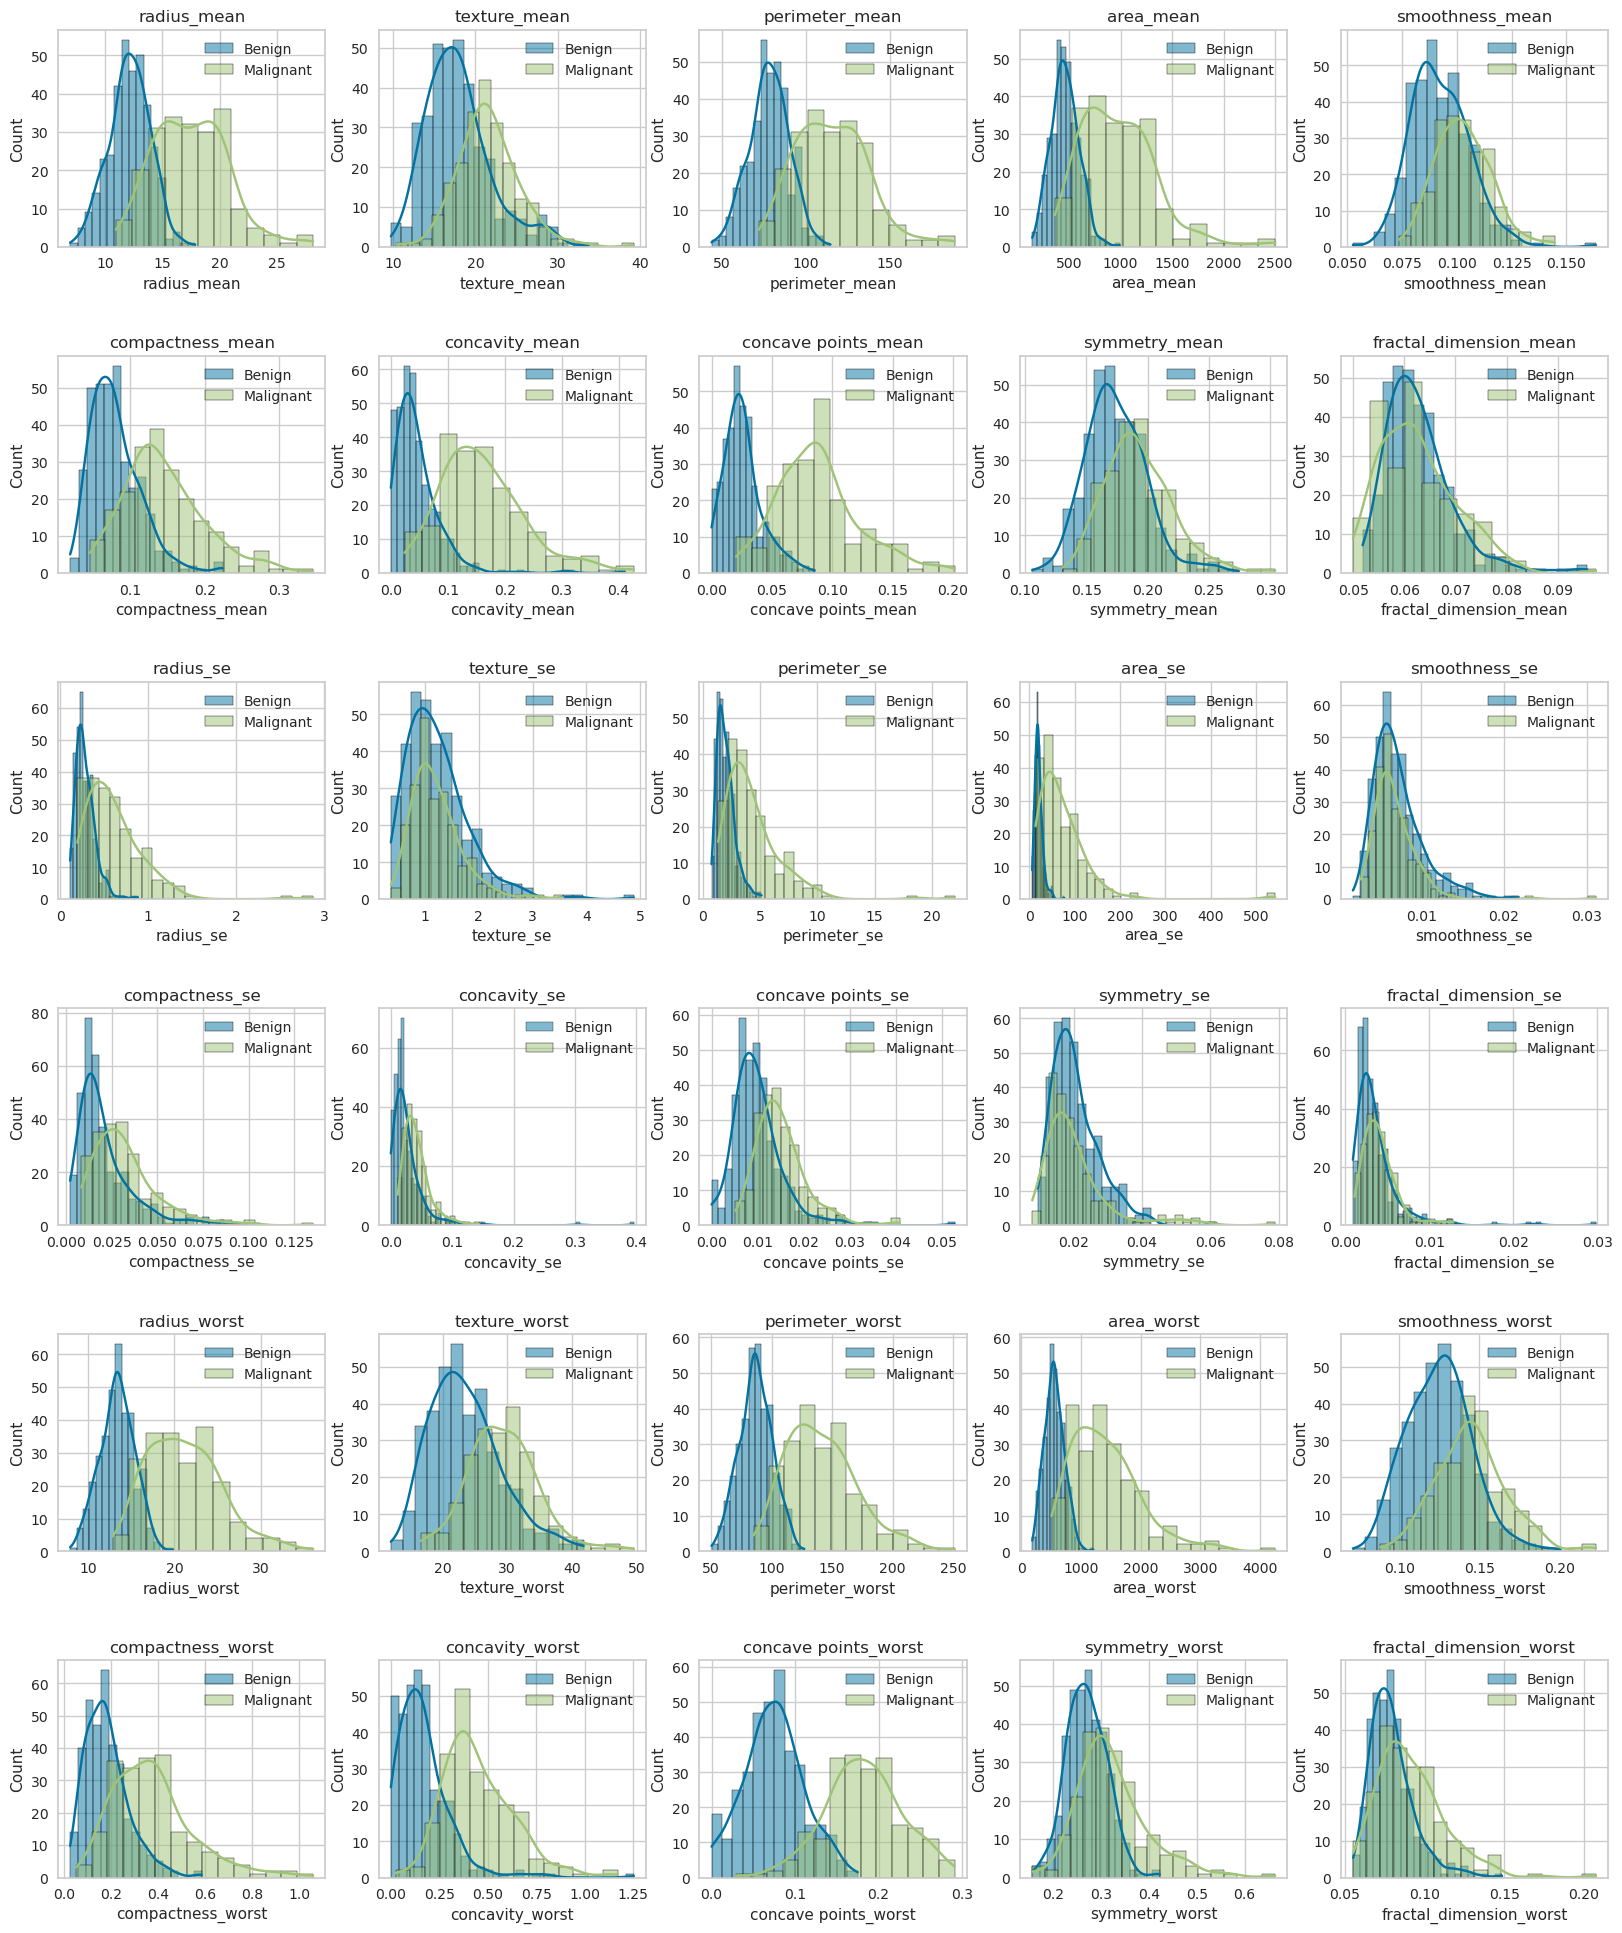

The running time for this cell is: 9.380169 seconds.


In [10]:
start = datetime.now()

# Create subplots with 6 rows and 5 columns
fig, axs = plt.subplots(6, 5, figsize=(20, 24))

# Iterate through each feature and plot its distribution
features = list(df.columns)
features.remove('diagnosis')
for i in range(len(features)):
    row = i // 5
    col = i % 5
    sns.histplot(df[df['diagnosis'] == 0][features[i]], kde=True, ax=axs[row, col], label='Benign')
    sns.histplot(df[df['diagnosis'] == 1][features[i]], kde=True, ax=axs[row, col], label='Malignant')
    axs[row, col].set_title(f'{features[i]}')
    axs[row, col].legend(loc='best')

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

end = datetime.now()
print(f'The running time for this cell is: {(end-start).total_seconds()} seconds.')

Text(0.5, 1.0, 'Correlation Matrix')

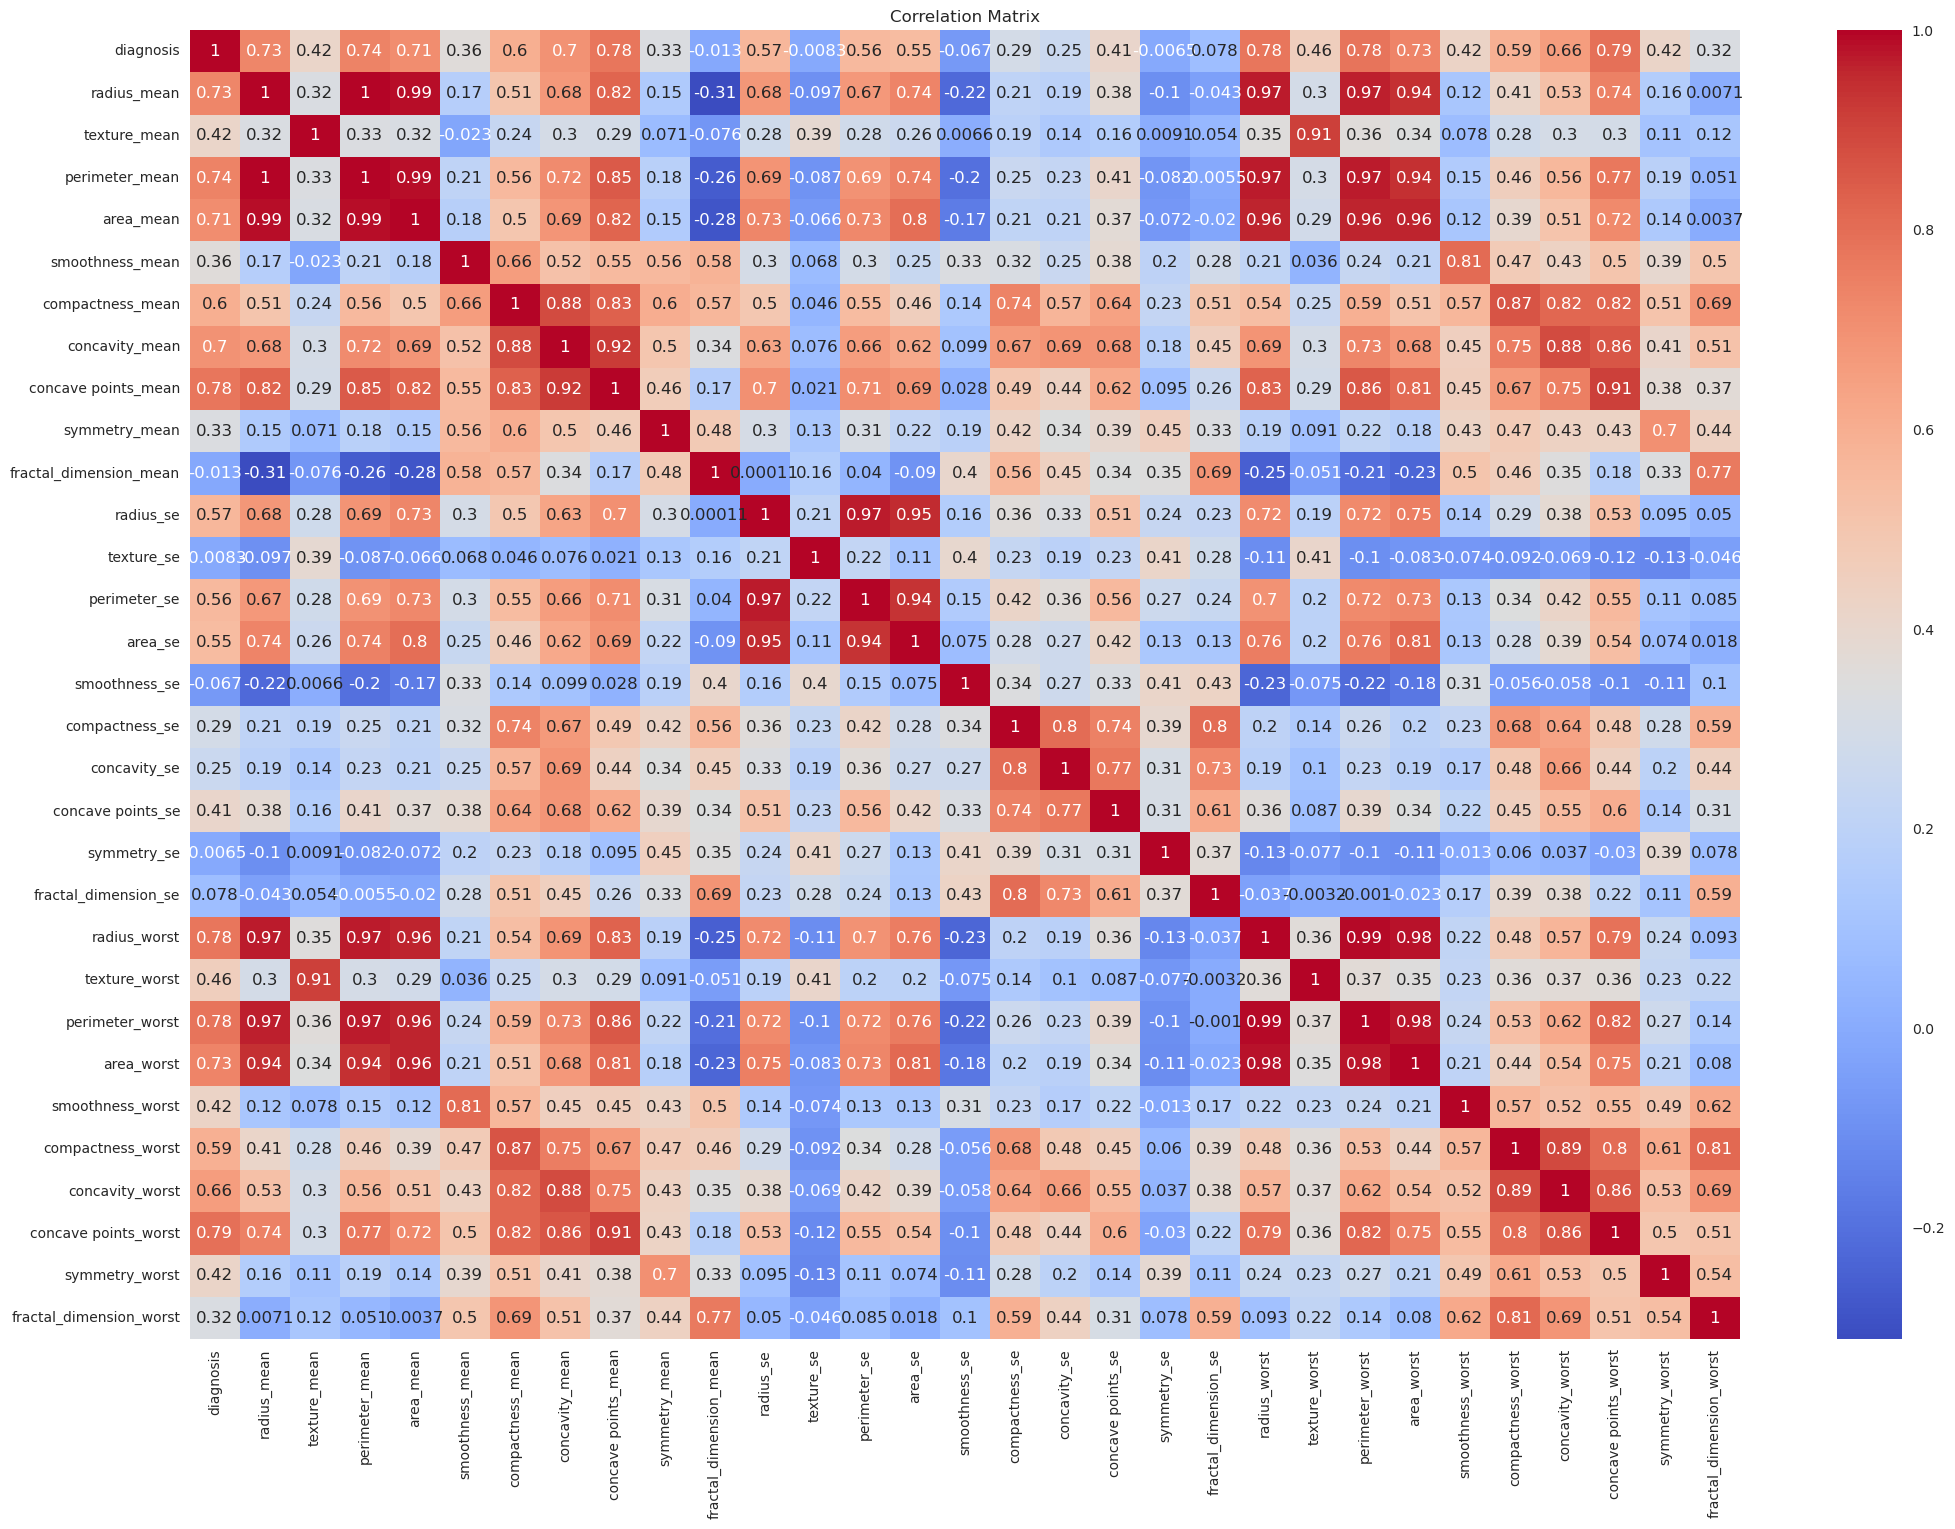

In [11]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(25,17))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [12]:
# For each group of features, we have _mean, _se and _worst, let's group them together
# Create an empty dictionary to hold the feature groups
feature_groups = {}
fea = df.columns.to_list()
fea.remove('diagnosis')

# Loop over the feature names in the dataframe
for feature in fea:
    # Split the feature name into its prefix and suffix
    prefix, suffix = feature.split('_', 1)
    
    # If the prefix is not already a key in the dictionary, add it with an empty list as its value
    if prefix not in feature_groups:
        feature_groups[prefix] = []
    
    # Add the feature name to the list of features for its prefix
    feature_groups[prefix].append(feature)

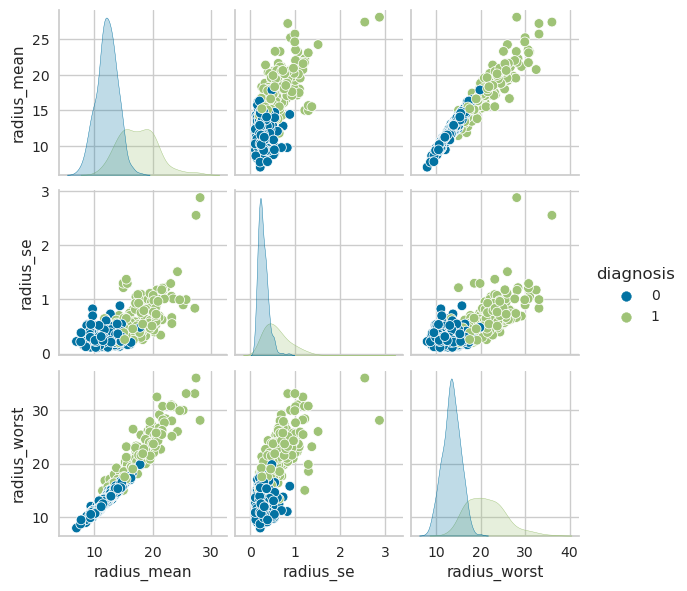

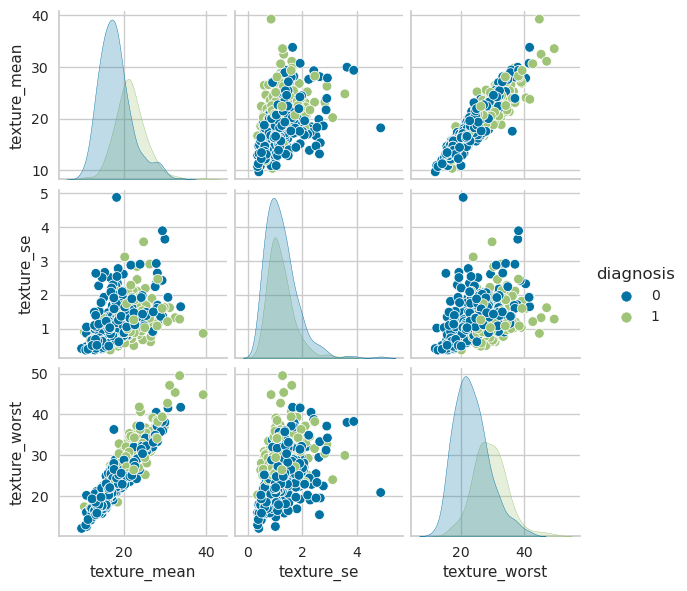

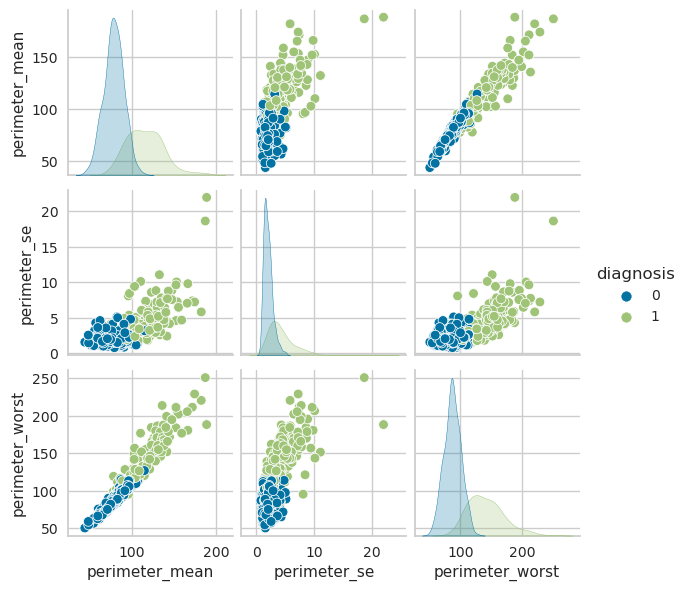

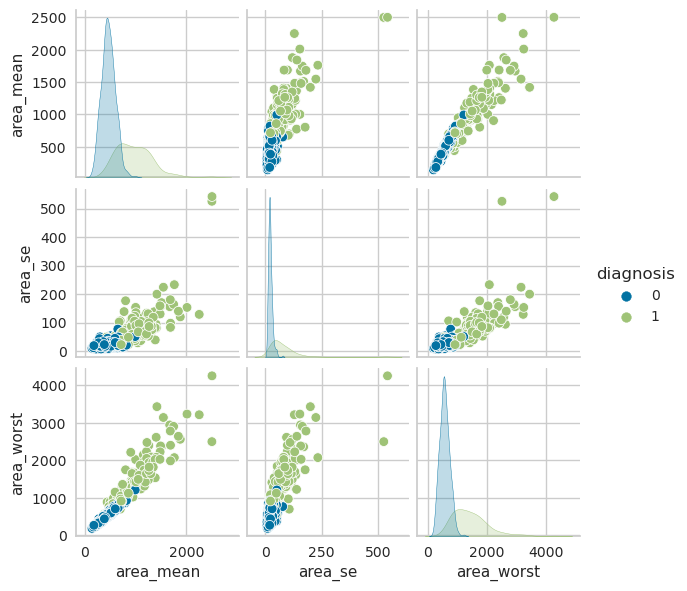

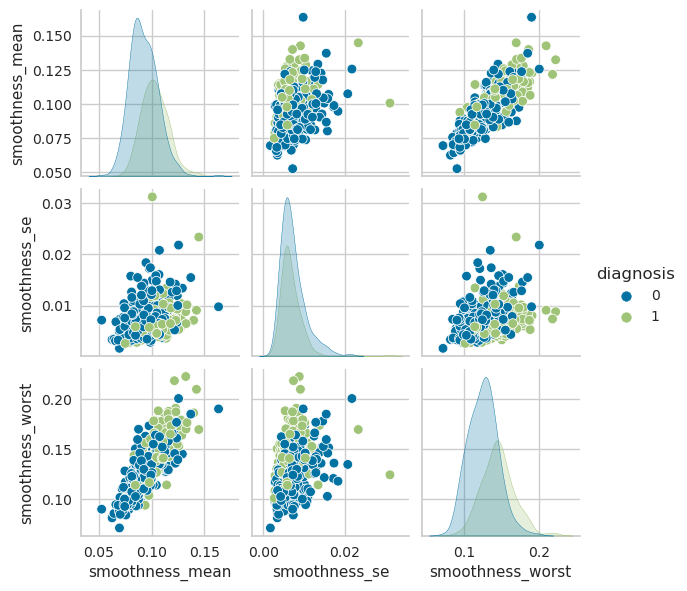

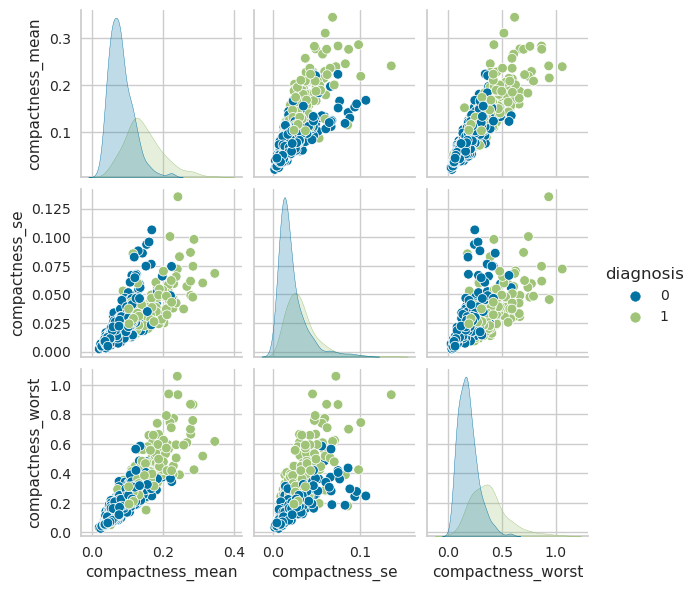

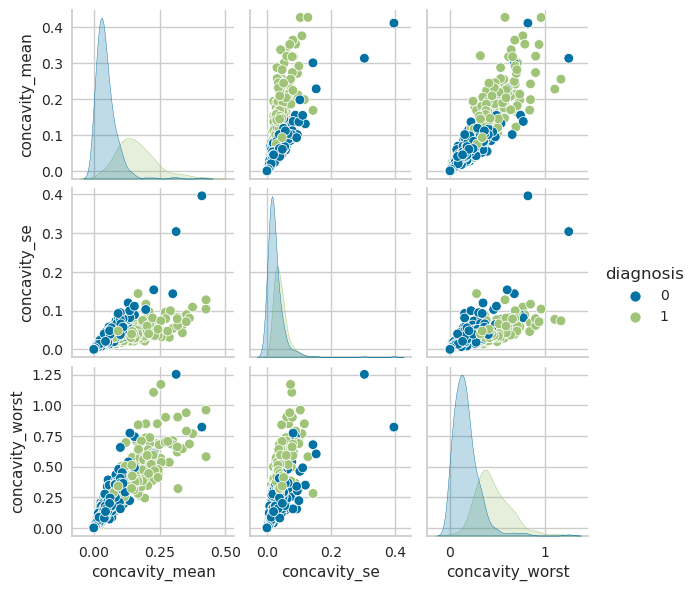

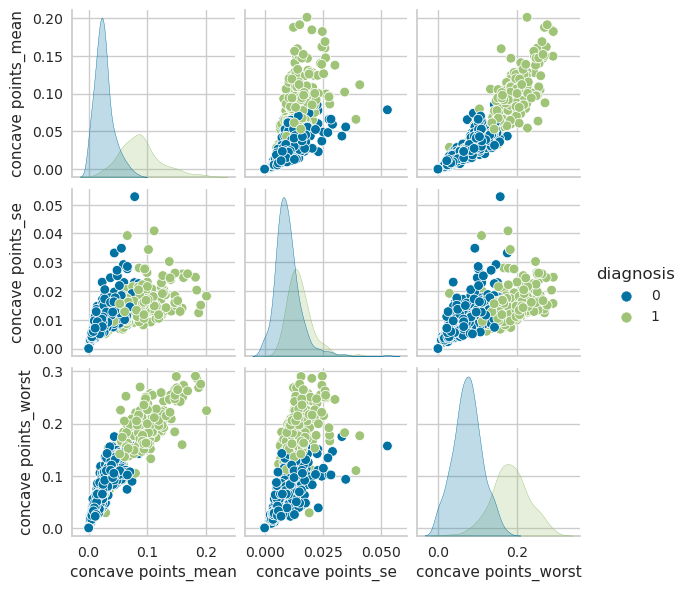

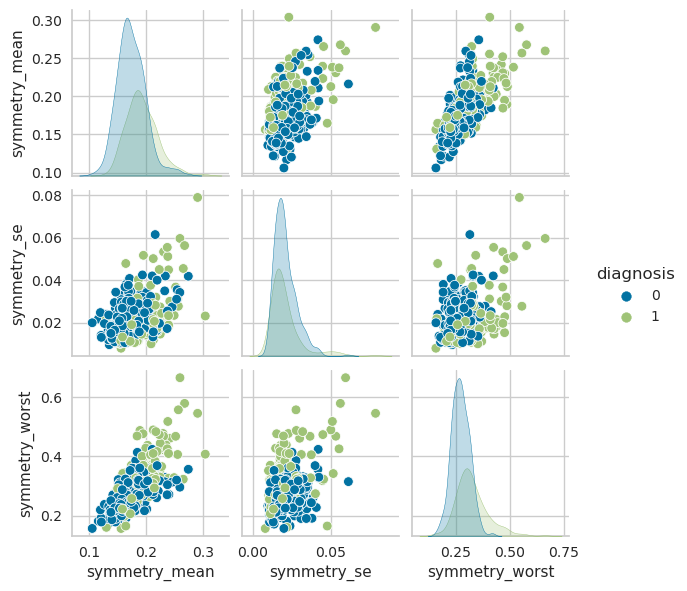

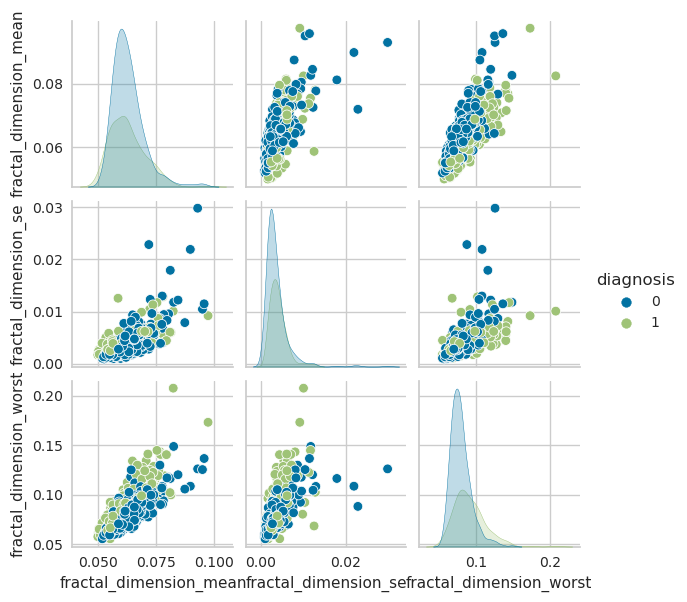

In [13]:
# Create pair plots for all groups of features
for key in feature_groups.keys():
    sns.pairplot(df, vars=feature_groups[key], hue='diagnosis', height=2)

# Model Prediction

## Compare models

In [14]:
start = datetime.now()

# initialize the setup
classification = setup(df, target='diagnosis', train_size=0.6, normalize=False, session_id=4162)

# compare models
compare_models()

# # select the best model based on precision
# best_model = automl(optimize = 'precision')
# print(best_model)

end = datetime.now()
print(f'The running time for this cell is: {(end-start).total_seconds()} seconds.')

,Description,Value
0,Session id,4162
1,Target,diagnosis
2,Target type,Binary
3,Original data shape,"(569, 31)"
4,Transformed data shape,"(569, 31)"
5,Transformed train set shape,"(341, 31)"
6,Transformed test set shape,"(228, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9589,0.9851,0.9365,0.9544,0.9438,0.9114,0.9135,0.2610
catboost,CatBoost Classifier,0.9561,0.9911,0.9135,0.9685,0.9388,0.9046,0.9070,5.6280
ridge,Ridge Classifier,0.9532,0.0000,0.8891,0.9838,0.9316,0.8963,0.9014,0.0330
et,Extra Trees Classifier,0.9530,0.9933,0.8974,0.9756,0.9330,0.8970,0.9007,0.3100
lightgbm,Light Gradient Boosting Machine,0.9530,0.9900,0.9288,0.9505,0.9368,0.8995,0.9029,0.3700
lda,Linear Discriminant Analysis,0.9445,0.9881,0.8744,0.9750,0.9187,0.8771,0.8832,0.0450
rf,Random Forest Classifier,0.9444,0.9884,0.8981,0.9524,0.9218,0.8788,0.8825,0.3280
qda,Quadratic Discriminant Analysis,0.9444,0.9821,0.9442,0.9147,0.9269,0.8820,0.8851,0.0420
ada,Ada Boost Classifier,0.9444,0.9770,0.9128,0.9396,0.9239,0.8800,0.8827,0.1740
gbc,Gradient Boosting Classifier,0.9443,0.9855,0.9135,0.9396,0.9239,0.8800,0.8830,0.2470


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

The running time for this cell is: 93.12553 seconds.


It seems that XGBoost has a higher performance in forecasting. Note that XGBoost also performs well with such small or medium data sets like this one!

Now it's time to make our goal clear. Since we want to determine if it is benign or malignant cancer, we of course want to identify the malignant cancers correctly among all. In other words, among all the actual positives(true positive + false negative), we want to predict as many as true positives. Thus, our goal is to optimize our recall score. (you can optimize other scores based on your need and the question.)

> The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. Retrieved from [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

In [15]:
# Assign the variables
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=seed)

## Baseline
Let's train a **baseline** model. The purpose of a baseline model is to provide a simple, initial benchmark for evaluating the performance of more complex and sophisticated models in the future. 

[0]	validation_0-logloss:0.46267	validation_1-logloss:0.48862
[1]	validation_0-logloss:0.33383	validation_1-logloss:0.37137
[2]	validation_0-logloss:0.25039	validation_1-logloss:0.30062
[3]	validation_0-logloss:0.19399	validation_1-logloss:0.24523
[4]	validation_0-logloss:0.15193	validation_1-logloss:0.21257
[5]	validation_0-logloss:0.12188	validation_1-logloss:0.18512
[6]	validation_0-logloss:0.10009	validation_1-logloss:0.15767
[7]	validation_0-logloss:0.08241	validation_1-logloss:0.14611
[8]	validation_0-logloss:0.06829	validation_1-logloss:0.13489
[9]	validation_0-logloss:0.05737	validation_1-logloss:0.12339
[10]	validation_0-logloss:0.05057	validation_1-logloss:0.11326
[11]	validation_0-logloss:0.04409	validation_1-logloss:0.11118
[12]	validation_0-logloss:0.03869	validation_1-logloss:0.10407
[13]	validation_0-logloss:0.03445	validation_1-logloss:0.09871
[14]	validation_0-logloss:0.03045	validation_1-logloss:0.09971
[15]	validation_0-logloss:0.02728	validation_1-logloss:0.09847
[1

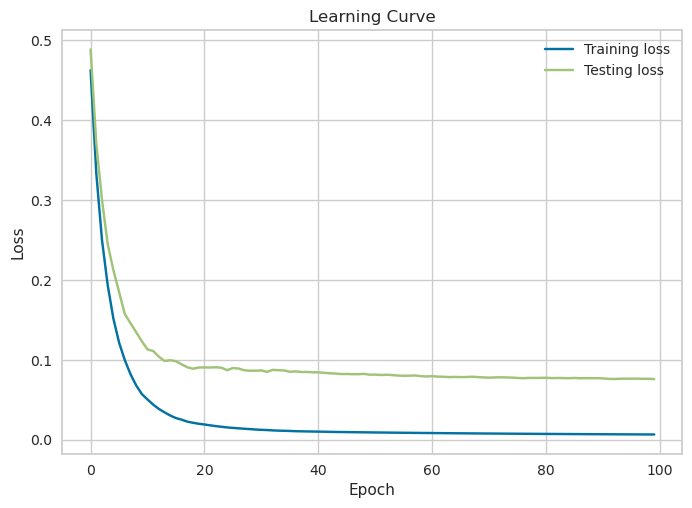

In [16]:
# Create the XGBoost classifier
xgb = XGBClassifier(random_state=seed, eval_metric= 'logloss')

# Train the model on the training data
xgb.fit(X_train, y_train, verbose=True, eval_set=[(X_train, y_train), (X_test, y_test)])

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Plot learning curve
# extract the training and testing loss values
train_loss = xgb.evals_result()['validation_0']['logloss']
test_loss = xgb.evals_result()['validation_1']['logloss']

# plot the training and testing curves (learning curve)
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

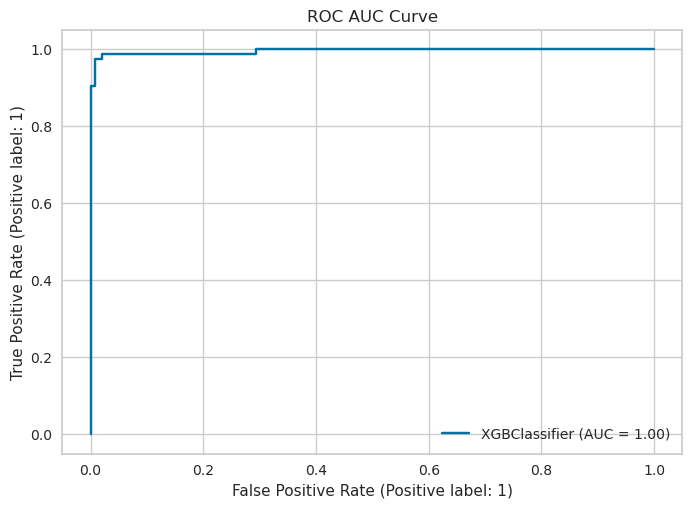

In [17]:
# plot the ROC AUC curve
roc_auc_plot = plot_roc_curve(xgb, X_test, y_test)
plt.title('ROC AUC Curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       143
           1       0.99      0.93      0.96        85

    accuracy                           0.97       228
   macro avg       0.97      0.96      0.97       228
weighted avg       0.97      0.97      0.97       228

Accuracy: 96.93%


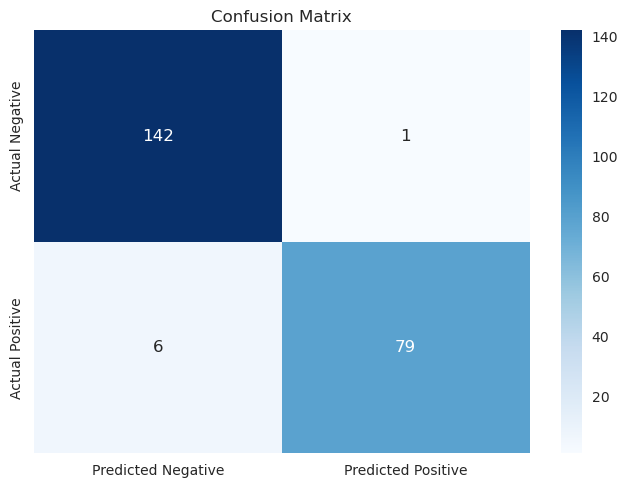

In [18]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Create heatmap of the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

# Show the plot
plt.title('Confusion Matrix')
plt.show()

In [19]:
# get feature importance scores
importances = xgb.get_booster().get_score(importance_type='gain')

# create a dataframe from the dictionary of scores
fi = pd.DataFrame({'Feature': list(importances.keys()), 'Importance Score': list(importances.values())})

# sort the data frame by importance scores
fi.sort_values(by='Importance Score', ascending=False, inplace=True)

fi

,Feature,Importance Score
17,radius_worst,21.341825
19,perimeter_worst,17.691399
24,concave points_worst,10.151779
6,concave points_mean,6.337302
23,concavity_worst,2.230813
2,area_mean,2.182276
26,fractal_dimension_worst,2.159702
1,texture_mean,2.149055
16,fractal_dimension_se,2.047891
0,radius_mean,1.514676


<AxesSubplot:>

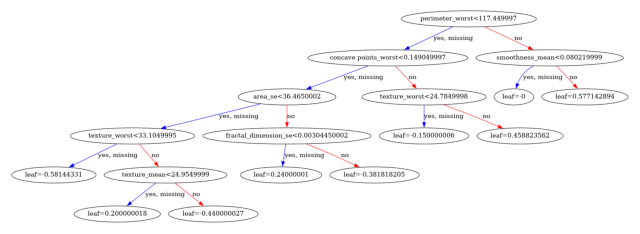

In [20]:
# Plot the first tree in the model
plot_tree(xgb, num_trees=0)

Althought our precision score and recall score are pretty high, but considering the learning curve and ROC AUC curve, our model may be prone to overfit to the training data. When it comes to new and unseen data, our model cannot perform well. \
Therefore, we need to optimize our model!

## Feature Engineering - Optional
We can derive some new attributes to our dataset. These derived attributes may or may NOT help improve our model, which means there is no guranteed that they will make our model perform better than the baseline. We have to evaluate the model again after adding these new attributes, and proceed if they are of help. \
However, our model already suffers from the issue of overfitting, we are ***NOT*** gonna implement this part of codes to avoid increasing the complexity of the model.

In [21]:
# Find all kinds of attributes in the dataset
prefix_list = [x.rsplit('_', 1)[0] for x in df.columns]
prefix_list.remove('diagnosis')
print(list(set(prefix_list)))

['concave points', 'area', 'concavity', 'symmetry', 'texture', 'perimeter', 'radius', 'smoothness', 'fractal_dimension', 'compactness']


In [22]:
# Derive new attributes, which are the differences between _se and _worst (prefix is ignored)
for pre in prefix_list:
    df[pre+'_diff'] = df[pre+'_worst'] - df[pre+'_se']

In [23]:
# Assign the variables
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=seed)

In [24]:
# Create the XGBoost classifier object
xgb = XGBClassifier(random_state=seed, eval_metric= 'logloss')

# Train the model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       143
           1       1.00      0.93      0.96        85

    accuracy                           0.97       228
   macro avg       0.98      0.96      0.97       228
weighted avg       0.97      0.97      0.97       228

Accuracy: 97.37%


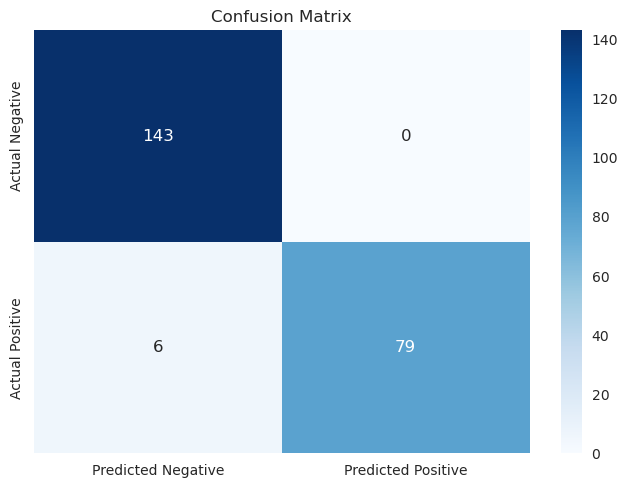

In [25]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Create heatmap of the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

# Show the plot
plt.title('Confusion Matrix')
plt.show()

## Optimization - Optional

In the following, we will use Random Search to find the optimal set of hyper-parameters of XGBoost based on recall score. We can also use the Grid Search, which will take long time to run.

In [26]:
start = datetime.now()

# Define the parameter distribution for random search
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
    'gamma': [0, 0.1, 0.3, 0.4, 0.5, 1],
    'reg_alpha': [0, 0.1, 1, 3],
    'reg_lambda': [0.1, 1, 2, 3 ,4]
}

# Create an XGBoost classifier
model = XGBClassifier(random_state=seed, eval_metric= 'logloss')

# Create a random search object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=5, scoring='recall', verbose=1, n_iter=50)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Print the best parameter settings and corresponding accuracy score
best_params = random_search.best_params_
print("Best parameters: ", best_params)
print("Best accuracy score: ", random_search.best_score_)

end = datetime.now()
print(f'The running time for this cell is: {(end-start).total_seconds()} seconds.')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'reg_lambda': 0.1, 'reg_alpha': 0, 'learning_rate': 0.4, 'gamma': 0.3}
Best accuracy score:  0.952923076923077
The running time for this cell is: 82.015717 seconds.


In [27]:
# Create the XGBoost classifier object
xgb = XGBClassifier(random_state=seed, eval_metric= 'logloss', reg_lambda=best_params['reg_lambda'], reg_alpha=best_params['reg_alpha'], learning_rate=best_params['learning_rate'], gamma=best_params['gamma'])

# Train the model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       143
           1       1.00      0.93      0.96        85

    accuracy                           0.97       228
   macro avg       0.98      0.96      0.97       228
weighted avg       0.97      0.97      0.97       228

Accuracy: 97.37%


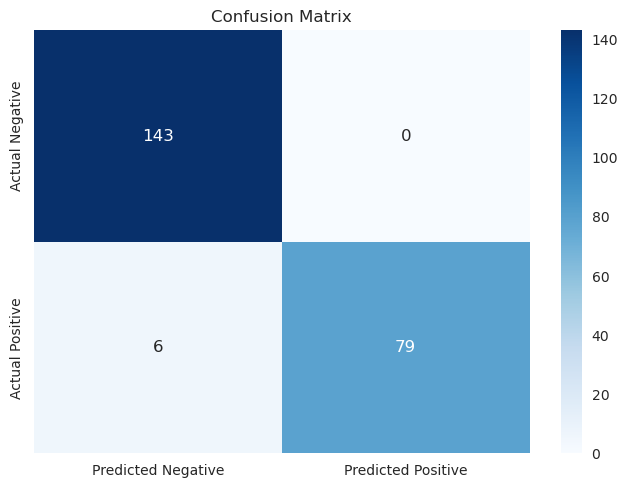

In [28]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Create heatmap of the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

# Show the plot
plt.title('Confusion Matrix')
plt.show()